[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75
 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75
 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75
 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75
 -0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25 -2.   -1.75 -1

/tmp/ipykernel_34428/3308708725.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


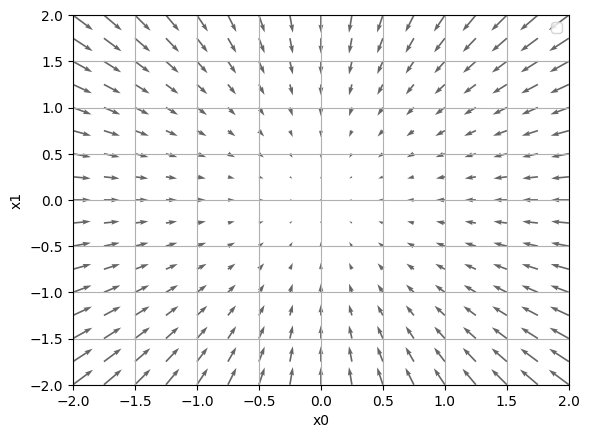

In [3]:
# coding: utf-8 

# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3 

import numpy as np 
import matplotlib.pylab as plt 
from mpl_toolkits.mplot3d import Axes3D 

 

#2차원을 고려한 수치미분 원소함수
def _numerical_gradient_no_batch(f, x): # 2차원을 고려한 수치미분 원소 함수 
    h = 1e-4 # 0.0001 
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성 

     

    for idx in range(x.size): 
        tmp_val = x[idx] 

        # f(x+h) 계산 
        x[idx] = float(tmp_val) + h 
        fxh1 = f(x) 

        # f(x-h) 계산 
        x[idx] = tmp_val - h  
        fxh2 = f(x)  
        grad[idx] = (fxh1 - fxh2) / (2*h) 
        x[idx] = tmp_val # 값 복원 

    return grad 

 

 
#변수가 하나일때 수치미분과 변수가 두개일때 수치미분
def numerical_gradient(f, X): 
    if X.ndim == 1: 
        return _numerical_gradient_no_batch(f, X) # 변수가 하나일 때 수치미분 
    else: 
        grad = np.zeros_like(X) 
        for idx, x in enumerate(X): 
            print(x) 
            grad[idx] = _numerical_gradient_no_batch(f, x) # 변수가 2개 이상일 때 수치 미분 

        return grad 

 

 
#변수가 한개일때와 두개일때
def function_2(x): 
    if x.ndim == 1: # 변수가 하나일 때 
        return np.sum(x**2) 
    else: # 변수가 두개일 때 
        return np.sum(x**2, axis=1) 

 

 

def tangent_line(f, x): # 접선을 구하는 함수 

    d = numerical_gradient(f, x) 
    print(d) 
    y = f(x) - d*x 
    return lambda t: d*t + y 

      

if __name__ == '__main__': 
    #2차원 빈평면 만듬
    x0 = np.arange(-2, 2.5, 0.25) 
    x1 = np.arange(-2, 2.5, 0.25) 
    X, Y = np.meshgrid(x0, x1) 

    #2차원 평면을 1차원으로 평탄화
    X = X.flatten() 
    Y = Y.flatten() 

    print(X) 
    print(Y) 

    #각좌표 기울기 계산
    grad = numerical_gradient(function_2, np.array([X, Y]) ) 
    print(grad) 

 
    #각 좌표에 대한 기울기를 화살표로 표현
    plt.figure() 
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40) 
    plt.xlim([-2, 2]) 
    plt.ylim([-2, 2]) 
    plt.xlabel('x0') 
    plt.ylabel('x1') 
    plt.grid() 
    plt.legend() 
    plt.draw() 
    plt.show() 